In [171]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# import statsmodels.api as sm
#import statsmodels.formula.api as smf




In [4]:

data = pd.read_csv("new_data_with_count.csv")
data.dropna()
data.rename(columns={'Gross.National.Income.GNI..in.USD': 'gross_national_income_GNI', 'Military.expenditure....of.GDP.': 'military_expenditure','Gross.Domestic.Product..GDP.': 'GDP'}, inplace=True)
valid_ideologies = ["leftist", "rightist", "centrist"]

data= data[data["leader_ideology"].isin(valid_ideologies)]
data= data[data["hog_ideology"].isin(valid_ideologies)]
# Ensure democracy is binary (convert 'yes'/'no' to 1/0 if needed)
data.columns = data.columns.str.replace('.', '_', regex=False)


print(data.head())
data.dropna()


   Unnamed: 0  Country  Year hog_ideology leader_ideology match_hog_leader  \
0           1  Albania  1990      leftist         leftist              yes   
1           2  Albania  1996     rightist        rightist               no   
2           3  Albania  1997      leftist         leftist              yes   
3           4  Albania  1998      leftist         leftist              yes   
4           5  Albania  1999      leftist         leftist              yes   

  democracy                           region  IMF_based_exchange_rate  \
0        no  Eastern Europe and Central Asia                 7.745833   
1        no  Eastern Europe and Central Asia               104.498917   
2        no  Eastern Europe and Central Asia               148.932917   
3        no  Eastern Europe and Central Asia               150.633333   
4        no  Eastern Europe and Central Asia               137.690583   

   Population  ... Gross_capital_formation  Imports_of_goods_and_services  \
0   3295066.0  

,Unnamed: 0,Country,Year,hog_ideology,leader_ideology,match_hog_leader,democracy,region,IMF_based_exchange_rate,Population,...,Gross_capital_formation,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,wholesale_trade_restaurant_hotel_isic,gross_national_income_GNI,GDP,military_expenditure,Urban_population,Rural_population
0,1,Albania,1990,leftist,leftist,yes,no,Eastern Europe and Central Asia,7.745833,3295066.0,...,5.431669e+08,4.828841e+08,8.631767e+08,2.985798e+07,1.391204e+08,2.143811e+09,2.145751e+09,5.888301,1197222.0,2089320.0
1,2,Albania,1996,rightist,rightist,no,no,Eastern Europe and Central Asia,104.498917,3271331.0,...,4.509509e+08,1.158532e+09,3.280966e+08,1.143496e+08,6.252993e+08,3.271327e+09,3.199642e+09,1.379030,1250518.0,1917515.0
2,3,Albania,1997,leftist,leftist,yes,no,Eastern Europe and Central Asia,148.932917,3253719.0,...,3.795503e+08,8.673393e+08,2.076360e+08,1.021116e+08,4.391012e+08,2.274234e+09,2.224654e+09,1.283081,1260414.0,1887867.0
3,4,Albania,1998,leftist,leftist,yes,no,Eastern Europe and Central Asia,150.633333,3232175.0,...,5.591266e+08,1.026883e+09,2.091365e+08,1.432659e+08,4.976294e+08,2.631658e+09,2.554869e+09,1.238243,1270214.0,1858316.0
4,5,Albania,1999,leftist,leftist,yes,no,Eastern Europe and Central Asia,137.690583,3208260.0,...,7.829524e+08,1.204031e+09,2.561817e+08,1.987122e+08,6.829865e+08,3.297165e+09,3.221670e+09,1.249210,1279853.0,1828925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,2950,Zimbabwe,2016,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,14452704.0,...,2.026381e+09,6.426700e+09,4.102626e+09,2.091819e+09,4.128620e+09,1.877295e+10,2.054868e+10,1.741985,4715311.0,9884983.0
2950,2951,Zimbabwe,2017,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,14751101.0,...,3.240458e+09,6.693807e+09,6.637330e+09,2.250543e+09,4.421973e+09,2.118140e+10,2.204065e+10,1.592340,4775100.0,10037382.0
2951,2952,Zimbabwe,2018,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,15052184.0,...,3.345405e+09,6.712015e+09,6.870555e+09,2.492558e+09,4.772648e+09,2.315156e+10,2.364527e+10,1.137810,4842447.0,10192005.0
2952,2953,Zimbabwe,2019,leftist,leftist,yes,no,Sub-Saharan Africa,1.000000,15354608.0,...,3.117897e+09,5.767050e+09,6.623454e+09,1.680270e+09,5.008252e+09,2.223810e+10,2.259452e+10,0.729567,4918908.0,10352460.0


We see that min year is 1990 and max is 2020 so this confirms our filter. Mean military expenditure is aroung 2 percent of GDP, In the dataset urban and rural population counts seem to be balanced. Mean GDP is 4753213e+11. Compared to other sectors, wholesale seems to be the one with the highest USD output. SD is high in construction outputs.

Visualizing correlations helps us see how variables relate:

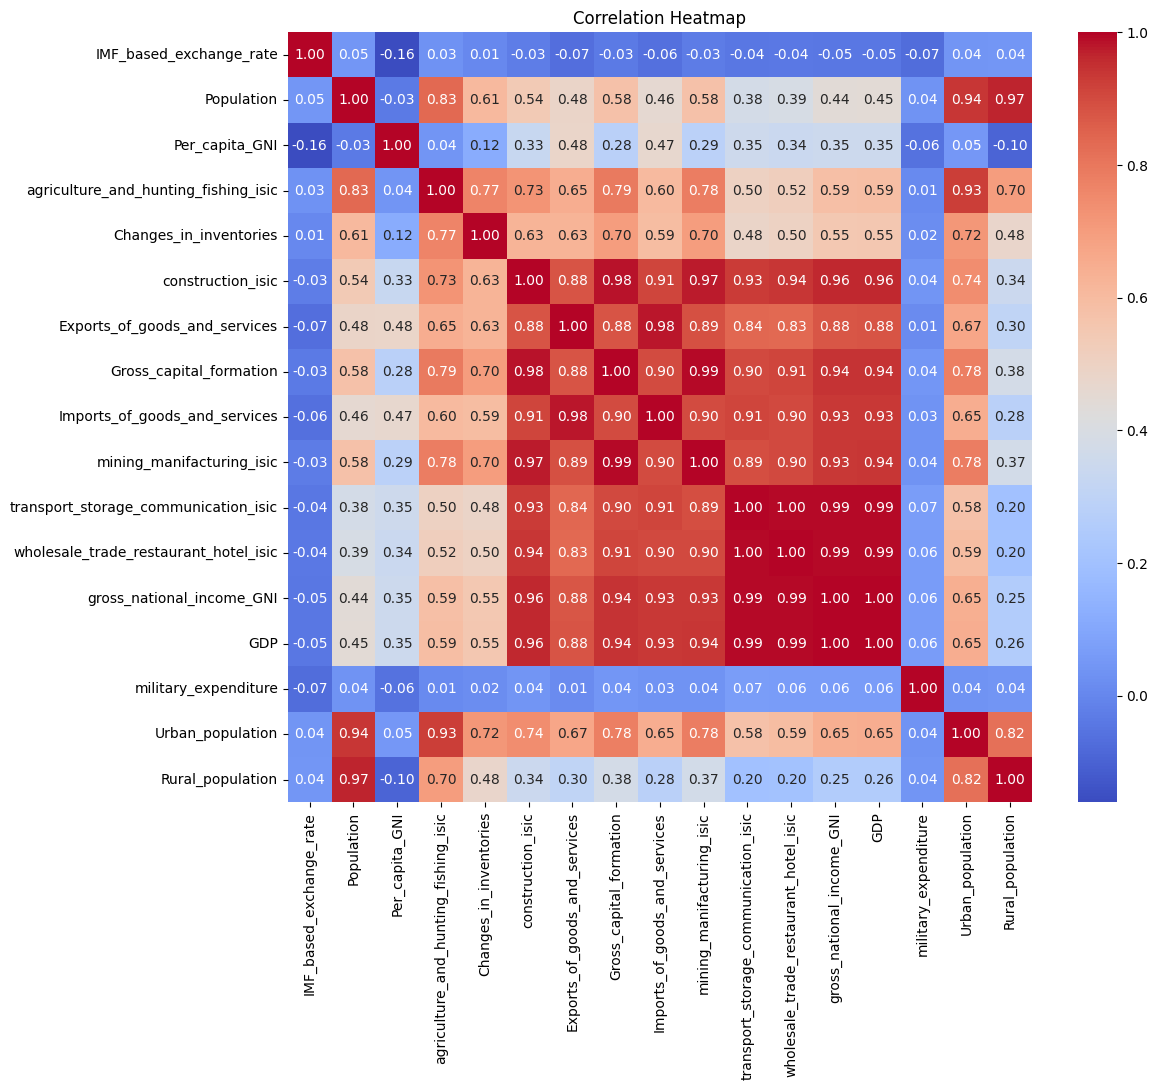

In [4]:
selected_cols = ['IMF_based_exchange_rate', 'Population', 'Currency', 'Per_capita_GNI', 'agriculture_and_hunting_fishing_isic', 'Changes_in_inventories', 'construction_isic', 'Exports_of_goods_and_services', 'Gross_capital_formation', 'Imports_of_goods_and_services', 'mining_manifacturing_isic', 'transport_storage_communication_isic', 'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI', 'GDP', 'military_expenditure', 'Urban_population', 'Rural_population']



plt.figure(figsize=(12,10))
sns.heatmap(data[selected_cols].corr(numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


It seems like we have strong correlation for various variables. Military expenditure and exchange rates seem to be not correlated to other variables. Changes in inventories,population(we are interested in urban only), export-import( one to be chosen),gross capital formation,wholesale(tranport has 1 correlation), gdp or gni to be left or chosen.

We need to define target and features because it is hard to see how variables relate

In [5]:
features = ['IMF_based_exchange_rate', 'Per_capita_GNI', 'agriculture_and_hunting_fishing_isic', 'Changes_in_inventories', 'construction_isic', 'Exports_of_goods_and_services', 'Gross_capital_formation', 'Imports_of_goods_and_services', 'mining_manifacturing_isic', 'transport_storage_communication_isic', 'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI', 'GDP', 'military_expenditure', 'Urban_population', 'Rural_population']

X = data[features]
y = data['leader_ideology']


selected_cols = ['IMF_based_exchange_rate','Per_capita_GNI', 'agriculture_and_hunting_fishing_isic', 'construction_isic', 'Exports_of_goods_and_services', 'Gross_capital_formation', 'Imports_of_goods_and_services', 'mining_manifacturing_isic', 'transport_storage_communication_isic', 'wholesale_trade_restaurant_hotel_isic', 'gross_national_income_GNI', 'GDP', 'military_expenditure', 'Urban_population', 'Rural_population']

# Apply log transform
df_log = data.copy()

df_log[selected_cols] = np.log1p(df_log[selected_cols])  # or np.log1p() if values may be zero



## 5. Building Predictive Models
### 5.1 Linear Models

*   log\_population (size of country),
    
*   log\_percap\_gni (economic development level),
    
*   GDP shares of government consumption, investment, agriculture, exports, and imports,
    
*   military_spending.


We'll select features and target variable to predict political ideology:

In [ ]:
# Encode target variable REVISION
#le = LabelEncoder()
#y_encoded = le.fit_transform(y)


In [ ]:
# Standardize features REVISION
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [15]:
#print(merged.columns)
df_log['leader_ideology'] = df_log['leader_ideology'].astype('category')
print(df_log['Urban_population'] )
df_log.describe()

0       13.995515
1       14.039069
2       14.046952
3       14.054697
4       14.062257
          ...    
2949    15.366326
2950    15.378926
2951    15.392931
2952    15.408597
2953    15.426184
Name: Urban_population, Length: 2907, dtype: float64


,Unnamed: 0,Year,IMF_based_exchange_rate,Population,Per_capita_GNI,agriculture_and_hunting_fishing_isic,Changes_in_inventories,construction_isic,Exports_of_goods_and_services,Gross_capital_formation,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,wholesale_trade_restaurant_hotel_isic,gross_national_income_GNI,GDP,military_expenditure,Urban_population,Rural_population
count,2907.000000,2907.000000,2.907000e+03,2.907000e+03,2907.000000,2907.000000,2.907000e+03,2907.000000,2907.000000,2906.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2907.000000,2850.000000,2850.000000
mean,1475.927761,2005.417613,2.873732e+00,4.878521e+07,8.305029,21.884341,2.745778e+09,21.596581,23.456575,23.112808,23.611901,23.013356,22.053152,22.616685,24.598248,24.622855,0.978020,15.625173,15.100129
std,856.864902,8.776788,2.402169e+00,1.616460e+08,1.590030,1.760369,1.320264e+10,2.288962,2.205941,2.214052,2.017409,2.233749,2.256232,2.166506,2.146490,2.146125,0.398946,1.575860,2.321773
min,1.000000,1990.000000,2.990000e-08,3.653920e+05,4.543295,16.373707,-1.510000e+11,14.000905,17.266548,16.630189,17.922623,17.056585,16.297405,16.711084,18.838543,18.922174,0.016171,12.271977,0.000000
25%,730.500000,1998.000000,6.931472e-01,4.516300e+06,7.032624,20.746148,1.471190e+07,19.912635,21.898618,21.514193,22.113980,21.284411,20.381235,21.037944,22.982382,23.025552,0.718779,14.552580,14.054043
50%,1473.000000,2006.000000,2.009514e+00,1.045616e+07,8.252967,21.856542,2.915697e+08,21.451879,23.314762,22.930062,23.377696,22.872636,21.958474,22.390494,24.377617,24.415274,0.922722,15.390023,15.225273
75%,2220.500000,2013.000000,4.630512e+00,2.957408e+07,9.673414,23.004842,1.512241e+09,23.228185,25.135875,24.713918,25.124935,24.683323,23.704854,24.175114,26.189212,26.203905,1.208371,16.635494,16.298282
max,2954.000000,2020.000000,9.587626e+00,1.424930e+09,11.552050,27.796536,2.110000e+11,27.679811,28.631653,29.482621,28.772054,29.146148,28.441951,28.768854,30.712931,30.694412,3.902321,20.580331,20.631961


In [ ]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

Now, split our data:

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### 5.2 GLM Models





### 5.2.1 Binomial Model

Response variable - democracy, start with all features as predictors

In [455]:
from statsmodels.formula.api import glm

import statsmodels.api as sm

In [574]:
df_log = df_log.drop('Unnamed: 0', axis=1)
df_log_new = df_log.copy().dropna()

In [437]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('democracy',axis=1), df_log_new['democracy'],
    test_size=0.2, random_state=1
)

In [465]:
predictors = '+'.join([col for col in X_train.columns])

binomial_gam = glm(
    f'democracy ~ {predictors}', 
    data=df_log_new.loc[X_train.index],
    family=sm.families.Binomial(),
)


In [466]:
binomial_gam_res = binomial_gam.fit()

In [459]:
binomial_gam_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              democracy   No. Observations:                 2270
Model:                            GLM   Df Residuals:                     2246
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -789.59
Date:                Mon, 12 May 2025   Deviance:                       1579.2
Time:                        23:04:40   Pearson chi2:                 1.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4401
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               137.5722     18.736      7.343      0.000     100.851     174.293
Country                                   0.0158      0.003      4.780      0.000       0.009       0.022
Year                                     -0.0752      0.010     -7.754      0.000      -0.094      -0.056
hog_ideology                             -0.8409      0.202     -4.154      0.000      -1.238      -0.444
leader_ideology                           0.7368      0.208      3.542      0.000       0.329       1.145
match_hog_leader                         -0.5554      0.174     -3.196      0.001      -0.896      -0.215
region                                    0.0544      0.054      1.005      0.315      -0.052       0.160
IMF_based_exchange_rate                   0.1091      0.031      3.525      0.000       0.048       0.170
Population                             3.205e-09   6.39e-10      5.019      0.000    1.95e-09    4.46e-09
Currency                                 -0.0259      0.005     -5.514      0.000      -0.035      -0.017
Per_capita_GNI                            3.2437      0.264     12.269      0.000       2.726       3.762
agriculture_and_hunting_fishing_isic     -0.8677      0.160     -5.409      0.000      -1.182      -0.553
Changes_in_inventories                -5.403e-11   9.25e-12     -5.843      0.000   -7.22e-11   -3.59e-11
construction_isic                        -0.4328      0.158     -2.744      0.006      -0.742      -0.124
Exports_of_goods_and_services            -0.9231      0.247     -3.736      0.000      -1.407      -0.439
Gross_capital_formation                   0.3802      0.223      1.703      0.089      -0.057       0.818
Imports_of_goods_and_services             0.4132      0.295      1.400      0.162      -0.165       0.992
mining_manifacturing_isic                -1.4949      0.234     -6.400      0.000      -1.953      -1.037
transport_storage_communication_isic     -0.5156      0.202     -2.548      0.011      -0.912      -0.119
wholesale_trade_restaurant_hotel_isic    -0.9839      0.246     -4.006      0.000      -1.465      -0.503
gross_national_income_GNI                 0.4962      0.967      0.513      0.608      -1.400       2.392
GDP                                       1.9243      1.045      1.842      0.066      -0.124       3.972
military_expenditure                     -2.1701      0.202    -10.764      0.000      -2.565      -1.775
Urban_population                          1.2191      0.219      5.571      0.000       0.790       1.648
Rural_population                          0.6979      0.108      6.451      0.000       0.486       0.910
=========================================================================================================
"""

In [487]:
y_pred_probes = binomial_gam_res.predict(X_test)

In [504]:
y_pred = (y_pred_probes >= 0.5).astype(int)

In [509]:
cm = confusion_matrix(Y_test, y_pred)

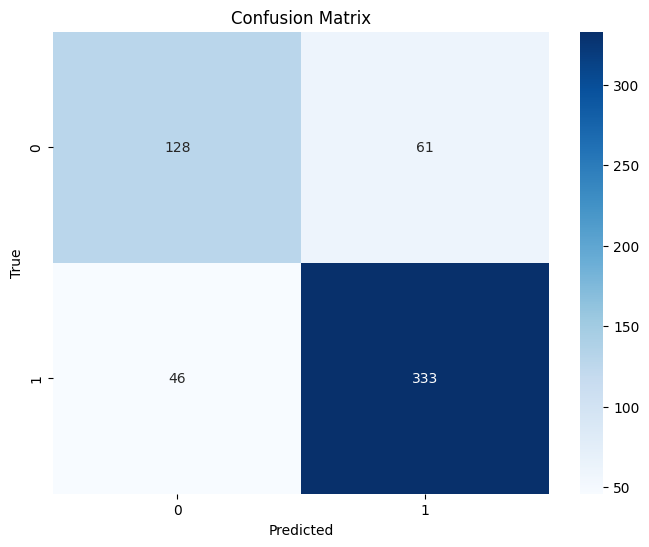

In [510]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [506]:
accuracy_score(Y_test, y_pred)

0.8116197183098591

In [507]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.68      0.71       189
           1       0.85      0.88      0.86       379

    accuracy                           0.81       568
   macro avg       0.79      0.78      0.78       568
weighted avg       0.81      0.81      0.81       568



***Let's drop couple of features which are not significant, and few which can potentially cause collinearity, 
and build an updated model***

In [512]:
X_reduce_train = X_train.drop(columns=['region', 'Imports_of_goods_and_services', 'gross_national_income_GNI'])
predictors = '+'.join([col for col in X_reduce_train.columns])

binomial_gam = glm(
    f'democracy ~ {predictors}', 
    data=df_log_new.drop(columns=['region', 'Imports_of_goods_and_services', 'gross_national_income_GNI']).loc[X_reduce_train.index],
    family=sm.families.Binomial(),
)


In [513]:
binomial_gam_res = binomial_gam.fit()

In [514]:
binomial_gam_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              democracy   No. Observations:                 2270
Model:                            GLM   Df Residuals:                     2249
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -791.93
Date:                Mon, 12 May 2025   Deviance:                       1583.9
Time:                        23:28:22   Pearson chi2:                 1.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4389
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                               131.2107     17.702      7.412      0.000      96.515     165.907
Country                                   0.0155      0.003      4.735      0.000       0.009       0.022
Year                                     -0.0715      0.009     -7.857      0.000      -0.089      -0.054
hog_ideology                             -0.8770      0.200     -4.376      0.000      -1.270      -0.484
leader_ideology                           0.7696      0.206      3.744      0.000       0.367       1.172
match_hog_leader                         -0.6357      0.158     -4.017      0.000      -0.946      -0.326
IMF_based_exchange_rate                   0.1058      0.030      3.548      0.000       0.047       0.164
Population                              3.33e-09   6.25e-10      5.327      0.000     2.1e-09    4.55e-09
Currency                                 -0.0250      0.005     -5.401      0.000      -0.034      -0.016
Per_capita_GNI                            3.2019      0.269     11.923      0.000       2.676       3.728
agriculture_and_hunting_fishing_isic     -0.8855      0.158     -5.612      0.000      -1.195      -0.576
Changes_in_inventories                -5.368e-11   9.18e-12     -5.848      0.000   -7.17e-11   -3.57e-11
construction_isic                        -0.4479      0.154     -2.900      0.004      -0.751      -0.145
Exports_of_goods_and_services            -0.6451      0.158     -4.092      0.000      -0.954      -0.336
Gross_capital_formation                   0.5209      0.202      2.575      0.010       0.124       0.917
mining_manifacturing_isic                -1.5879      0.223     -7.112      0.000      -2.025      -1.150
transport_storage_communication_isic     -0.5362      0.200     -2.682      0.007      -0.928      -0.144
wholesale_trade_restaurant_hotel_isic    -0.8916      0.237     -3.768      0.000      -1.355      -0.428
GDP                                       2.4693      0.527      4.687      0.000       1.437       3.502
military_expenditure                     -2.1288      0.200    -10.669      0.000      -2.520      -1.738
Urban_population                          1.1631      0.205      5.680      0.000       0.762       1.564
Rural_population                          0.7148      0.118      6.042      0.000       0.483       0.947
=========================================================================================================
"""

In [561]:
np.exp(binomial_gam_res.params['Per_capita_GNI'])

24.579251581908178

In [562]:
np.exp(binomial_gam_res.params['military_expenditure'])

0.1189835489997469

***
***Model interpretation***  

Statistically-wise, we see a better features chosen, as all of them are significant now.  
Pseudo R-squ. (CS) parameter tells us, that almost 44% of the variation are explained by the model.   
We can interpret coefficients of our model.  
For binary / binomial models to interpret coefficients properly, 
we need to get an exponential form of each coefficient, because by default, the activation function is logarithmic, 
and we need to take inverse of it.  

Let's start from the largest coefficient - Per_capita_GNI feature.  
A one-unit increase in this feature, leads to 24.5 times increase in an odds ratio for entry to be democratic,  
once other features are constant.  
An opposite example - military_expenditure feature.  
A one-unit increase leads to 89% decrease in an odds ratio for entry to be democratic.  
Here we can stop interpreting coefficients, as it will be the same explanation.  
To have a general look on features coefficients and there affect, I'll build a related plot below
***

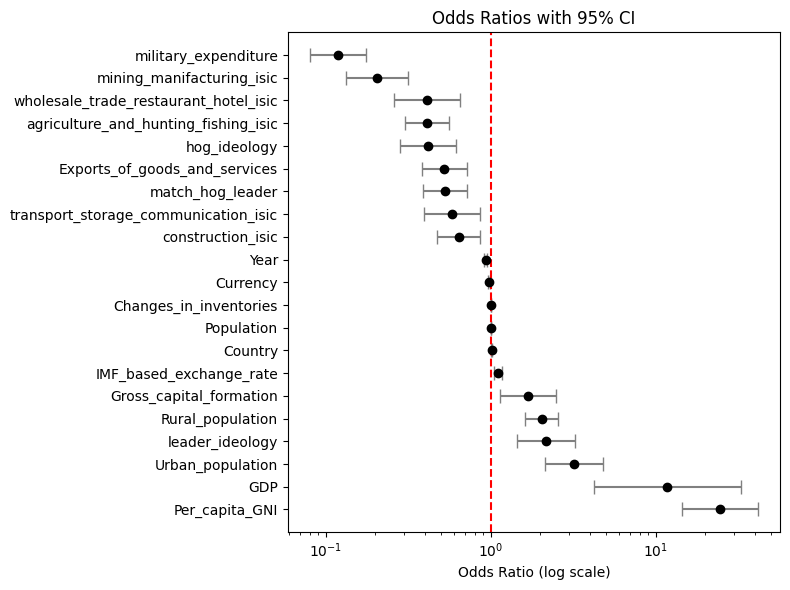

In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Get coefficients and confidence intervals
coefs = binomial_gam_res.params.drop(['Intercept'])
conf = binomial_gam_res.conf_int().drop(['Intercept'])
conf.columns = ['2.5%', '97.5%']

# Compute odds ratios and CI
odds_ratios = np.exp(coefs)
conf_exp = np.exp(conf)

# Create a DataFrame
or_df = pd.DataFrame({
    'Odds Ratio': odds_ratios,
    '2.5%': conf_exp['2.5%'],
    '97.5%': conf_exp['97.5%']
}).sort_values(by='Odds Ratio', ascending=False)

# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(or_df['Odds Ratio'], or_df.index, 
             xerr=[or_df['Odds Ratio'] - or_df['2.5%'], 
                   or_df['97.5%'] - or_df['Odds Ratio']],
             fmt='o', color='black', ecolor='gray', capsize=5)
plt.axvline(1, color='red', linestyle='--')
plt.xlabel("Odds Ratio (log scale)")
plt.xscale('log')
plt.title("Odds Ratios with 95% CI")
plt.tight_layout()
plt.show()

***Evaluate model performance***

In [521]:
y_pred_probes = binomial_gam_res.predict(X_test.drop(columns=['region', 'Imports_of_goods_and_services', 'gross_national_income_GNI']))


In [522]:
y_pred = (y_pred_probes >= 0.5).astype(int)

In [523]:
cm = confusion_matrix(Y_test, y_pred)

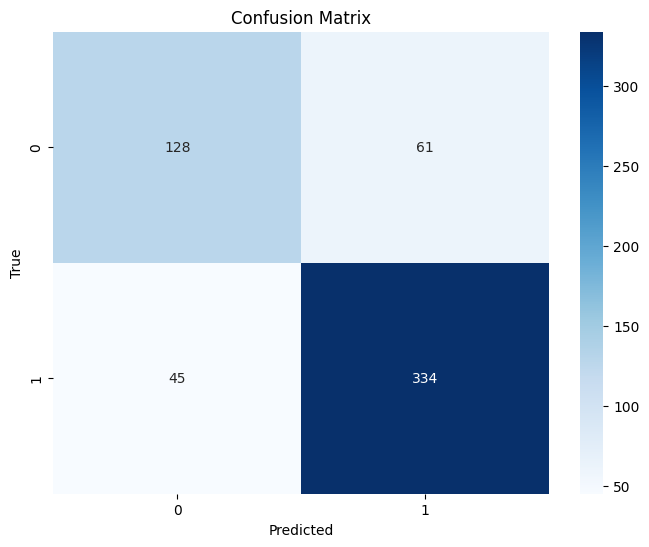

In [524]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [525]:
accuracy_score(Y_test, y_pred)

0.8133802816901409

In [526]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.68      0.71       189
           1       0.85      0.88      0.86       379

    accuracy                           0.81       568
   macro avg       0.79      0.78      0.79       568
weighted avg       0.81      0.81      0.81       568



In [569]:
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
auc = auc(fpr, tpr)

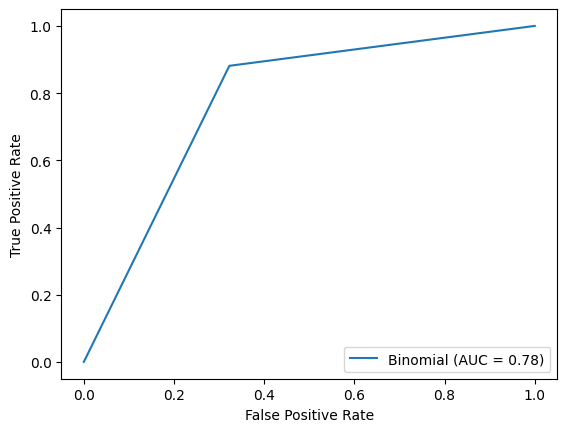

In [571]:
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc, estimator_name = 'Binomial')
display.plot()

***From the above results, we have confirmed that the model has quite good performance.  
In term of simplicity of the model and clear understanding of how features influence the response variable, 
it might be a good choice to use, if there's not such a goal to have as high accuracy as possible***

### 5.4 Neural Networks

**Neural Network**:

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from math import sqrt

from sklearn.model_selection import GridSearchCV



***MLP Classifier must deal with the dataset of numeric types.   
So let's update new dataframe, where for real value of string(object) type, we'll set a numeric equivalent for all the columns we use***

In [16]:
df_log.dtypes

Unnamed: 0                                 int64
Country                                   object
Year                                       int64
hog_ideology                              object
leader_ideology                           object
match_hog_leader                          object
democracy                                 object
region                                    object
IMF_based_exchange_rate                  float64
Population                               float64
Currency                                  object
Per_capita_GNI                           float64
agriculture_and_hunting_fishing_isic     float64
Changes_in_inventories                   float64
construction_isic                        float64
Exports_of_goods_and_services            float64
Gross_capital_formation                  float64
Imports_of_goods_and_services            float64
mining_manifacturing_isic                float64
transport_storage_communication_isic     float64
wholesale_trade_rest

In [252]:
column_mapper_dict = {}
for column in df_log.columns:
    if df_log[column].dtype == 'object':
        unique_vals = df_log[column].unique()
        column_mapper_dict[column] = {val: i for i, val in enumerate(unique_vals)}
        
        df_log_new[column] = df_log_new[column].map(column_mapper_dict[column])
        

In [253]:
column_mapper_dict

{'Country': {'Albania': 0,
  'Algeria': 1,
  'Angola': 2,
  'Argentina': 3,
  'Armenia': 4,
  'Australia': 5,
  'Austria': 6,
  'Azerbaijan': 7,
  'Bangladesh': 8,
  'Belgium': 9,
  'Benin': 10,
  'Bosnia and Herzegovina': 11,
  'Botswana': 12,
  'Brazil': 13,
  'Bulgaria': 14,
  'Burkina Faso': 15,
  'Burundi': 16,
  'Cambodia': 17,
  'Cameroon': 18,
  'Canada': 19,
  'Central African Republic': 20,
  'Chad': 21,
  'Chile': 22,
  'China': 23,
  'Colombia': 24,
  'Croatia': 25,
  'Cuba': 26,
  'Cyprus': 27,
  'Denmark': 28,
  'Djibouti': 29,
  'Dominican Republic': 30,
  'Ecuador': 31,
  'Egypt': 32,
  'El Salvador': 33,
  'Equatorial Guinea': 34,
  'Estonia': 35,
  'Ethiopia': 36,
  'Fiji': 37,
  'Finland': 38,
  'France': 39,
  'Gabon': 40,
  'Georgia': 41,
  'Germany': 42,
  'Ghana': 43,
  'Greece': 44,
  'Guatemala': 45,
  'Guinea': 46,
  'Guinea-Bissau': 47,
  'Honduras': 48,
  'Hungary': 49,
  'India': 50,
  'Indonesia': 51,
  'Iraq': 52,
  'Ireland': 53,
  'Israel': 54,
  'Italy

In [254]:
df_log_new.head()

,Country,Year,hog_ideology,leader_ideology,match_hog_leader,democracy,region,IMF_based_exchange_rate,Population,Currency,...,Gross_capital_formation,Imports_of_goods_and_services,mining_manifacturing_isic,transport_storage_communication_isic,wholesale_trade_restaurant_hotel_isic,gross_national_income_GNI,GDP,military_expenditure,Urban_population,Rural_population
0,0,1990,0,0,0,0,0,2.168577,3295066.0,0,...,20.112927,19.995287,20.576130,17.211963,18.750850,21.485851,21.486756,1.929824,13.995515,14.552350
1,0,1996,1,1,1,0,0,4.658701,3271331.0,0,...,19.926869,20.870420,19.608819,18.554771,20.253741,21.908462,21.886305,0.866693,14.039069,14.466541
2,0,1997,0,0,0,0,0,5.010188,3253719.0,0,...,19.754498,20.580941,19.151297,18.441577,19.900240,21.544909,21.522867,0.825526,14.046952,14.450959
3,0,1998,0,0,0,0,0,5.021465,3232175.0,0,...,20.141887,20.749794,19.158498,18.780213,20.025366,21.690880,21.661267,0.805691,14.054697,14.435182
4,0,1999,0,0,0,0,0,4.932245,3208260.0,0,...,20.478582,20.908941,19.361398,19.107368,20.341986,21.916329,21.893166,0.810579,14.062257,14.419239


#### Classification (multi-label)
##### Predict leader_ideology from the features we have

In [257]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('leader_ideology',axis=1), df_log_new['leader_ideology'],
    test_size=0.2, random_state=1
)

***MLP is very sensitive to feature scaling, so makes sense to scale features in the same way.  
We'll use a common approach in this case - StandardScaler.  
The only one problem which can be here is the case of outliers. They have a very strong negative effect on scaling***

***For the MLP Classifier or Regressor we need to provide some parameters.  
solver - Algorithm for optimization. LBFGS works pretty well with small datasets, so should be good fit in our case.  
alpha - regularization parameter. Helps to fight overfitting and bias.  
Increasing alpha -> smaller weights -> simpler decision boundaries (might improve overfitting effect).  
Decreasing alpha -> bigger weights -> more complex dicison boundaries (might fix high bias -> underfitting)***

***Now, lets build MLP Classifier with different hidden_layer_num parameter from 10 to 1500 with step 100, 
and check, will there be a benefit of using higher hidden_layer_num***

In [118]:
hidden_layer_num_accuracy_dict = {}
for hidden_layer_num in range(10,1500,100):
    pipeline = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", MLPClassifier(
        solver='lbfgs', 
        alpha=1e-5,
        hidden_layer_sizes=(hidden_layer_num,), 
        random_state=1
        )
        )
    ])

    pipeline.fit(X_train, Y_train)

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    
    hidden_layer_num_accuracy_dict[hidden_layer_num] = accuracy

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


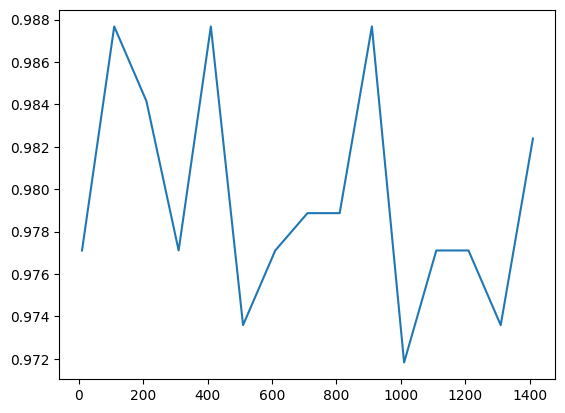

In [119]:
plt.plot(hidden_layer_num_accuracy_dict.keys(), hidden_layer_num_accuracy_dict.values())

***According to the above plot, we can say, that there's no any clear sign, 
that higher hidden_layer_num is better in our concrete case***

***Next, let's build an MLPClassifier model with some basic configuration, 
train it on a subset of data, predict results and calculate accuracy and other model evaluation criterias***

In [258]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("classifier", MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(400,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")


Accuracy: 0.9824


***The Accuracy looks to be extremely good***

In [141]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99       266
           1       0.98      0.99      0.99       238
           2       0.94      0.94      0.94        64

    accuracy                           0.98       568
   macro avg       0.97      0.97      0.97       568
weighted avg       0.98      0.98      0.98       568



***By checking classification report, the results look very good. Precision and recall have very high values***

In [142]:
cm = confusion_matrix(y_pred, Y_test)

In [143]:
cm

array([[264,   0,   1],
       [  1, 235,   3],
       [  1,   3,  60]])

In [144]:
import seaborn as sns

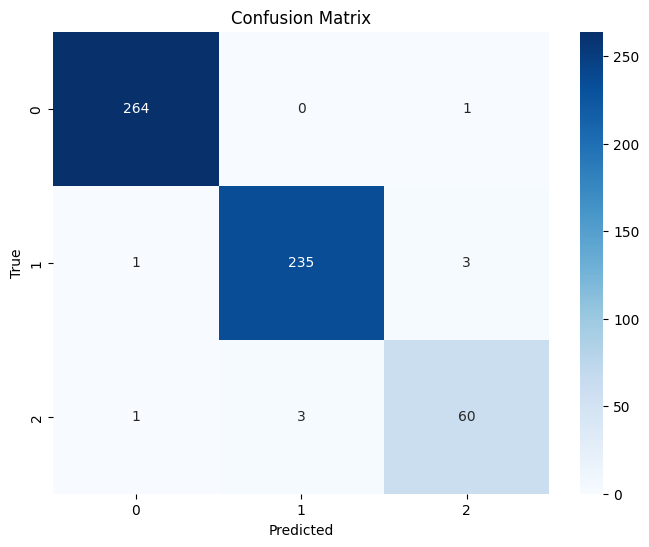

In [145]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

***We have a very high accuracy on predicting ideology from the features we include***

#### Classification (binary)
##### Predict democracy from the features we have

In [365]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('democracy',axis=1), df_log_new['democracy'],
    test_size=0.2, random_state=1
)

In [367]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("regressor", MLPClassifier(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(20,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [375]:
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.4f}")

Accuracy: 0.9613


In [369]:
cm = confusion_matrix(Y_test, y_pred)

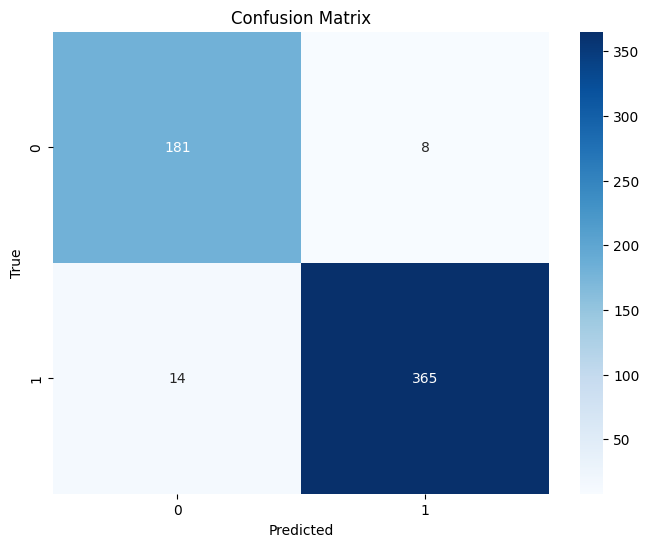

In [370]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [372]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       189
           1       0.98      0.96      0.97       379

    accuracy                           0.96       568
   macro avg       0.95      0.96      0.96       568
weighted avg       0.96      0.96      0.96       568



In [376]:
roc_auc_score(Y_test, y_pred)

0.9603663218438945

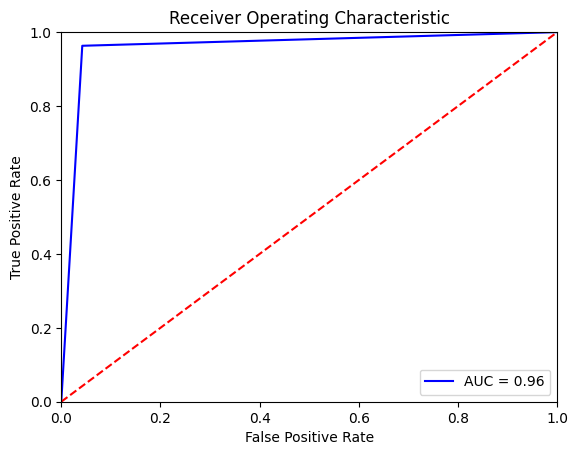

In [389]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
fpr, tpr, threshold = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

***By checking Accuracy, classification report, confusion matrix and ROC plot, we can come with a conclusion,
that model actually performs quite well to predict the binomial feature - democracy***

#### Regression
##### Predict military_expenditure from the features we have

In [393]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df_log_new.drop('military_expenditure',axis=1), df_log_new['military_expenditure'],
    test_size=0.2, random_state=1
)

In [394]:
pipeline = Pipeline(steps=[
("preprocessor", StandardScaler()),
("regressor", MLPRegressor(
    solver='lbfgs', 
    alpha=1e-5,
    hidden_layer_sizes=(50,), 
    random_state=1
    )
    )
])

pipeline.fit(X_train, Y_train)

y_pred = pipeline.predict(X_test)

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


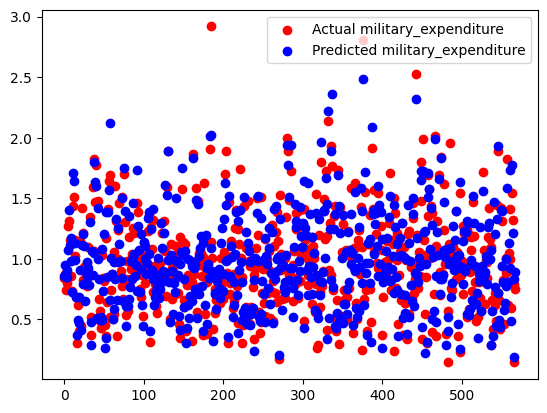

In [395]:
plt.scatter(range(len(Y_test)), Y_test, color='red')
plt.scatter(range(len(Y_test)), y_pred, color='blue')
plt.legend(['Actual military_expenditure', 'Predicted military_expenditure'])

***From the above scatterplot we see how close actual and predicted values are located to each other***

<AxesSubplot:xlabel='military_expenditure', ylabel='Count'>

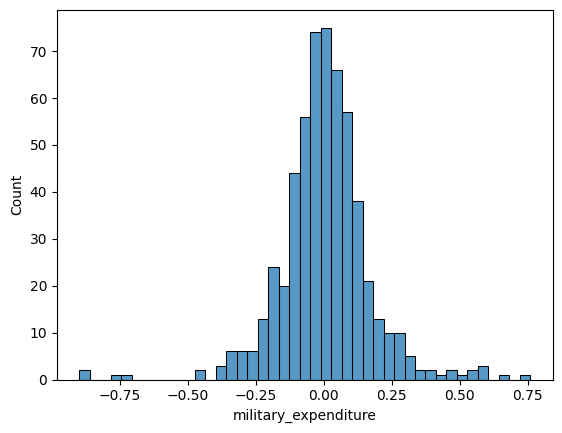

In [396]:
sns.histplot(y_pred - Y_test)

***The residuals are almost normally distributed***

In [397]:
sqrt(mean_squared_error(Y_test, y_pred))

0.16824370868967697

In [398]:
RMSE = sqrt(sum((y_pred - Y_test)**2)/Y_test.shape[0])

In [399]:
print(f"RMSE: {RMSE:.5f}")


RMSE: 0.16824


In [400]:
R2 = 1-sum((Y_test - y_pred)**2)/sum((Y_test - np.mean(Y_test))**2)

In [401]:
print(f"R2: {R2:.5f}")

R2: 0.82380


***As a result, we have a very low RMSE, and a good R2 score, showing us that the model predicts well*** 

***Let's execute a Cross-Validation to check, can we find a better model***

In [402]:
param_list = {
    "hidden_layer_sizes": [50,100],
    "activation": ["identity", "logistic", "tanh", "relu"],
    "alpha": [1e-5,1e-4],
    "solver": ["lbfgs", "sgd", "adam"]
}
gridCV = GridSearchCV(estimator=MLPRegressor(), param_grid=param_list)

In [403]:
gridCV.fit(X_train, Y_train)

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-package

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic O

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neura

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/utils

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neura

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/prowka/Knowledge/HSLU/II_semest

/Users/prowka/Knowledge/HSLU/II_semester/MPM02/mpm_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [-1.29223179e+06             nan -1.78864057e+08 -1.80268968e+06
             nan -4.79263828e+10 -1.23652323e+06             nan
 -2.27682281e+11 -1.55068222e+06             nan -7.72947157e+11
 -2.34950901e-02 -1.85322536e-02 -6.70101309e-02 -4.01561238e-02
 -2.37951104e-02 -2.55568367e-02 -2.14890689e-02 -1.81882038e-02
 -5.48180176e-02 -4.63089015e-02 -2.78279183e-02 -4.53075256e-02
 -3.20711520e-02 -6.37679889e-02 -6.76068586e-01 -4.45485303e-02
 -8.66904656e-02 -3.89516027e-01 -1.59870424e-02 -7.39606817e-02
 -6.17351365e-01 -3.03921699e-02 -5.59732129e-02 -5.97387466e-01
 -2.87773117e+12             nan -1.99613081e+14 -6.12468210e+11
             nan -4.00595565e+14 -3.95672501e+12             nan
 -1.06234198e+14 -1.10302349e+12             nan -1.02230081e+16]
  category=UserWarning,


GridSearchCV(estimator=MLPRegressor(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [1e-05, 0.0001],
                         'hidden_layer_sizes': [50, 100],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [407]:
gridCV.best_estimator_

MLPRegressor(activation='tanh', hidden_layer_sizes=50, solver='lbfgs')

In [408]:
best_predict = gridCV.best_estimator_.predict(X_test)

In [409]:
sqrt(mean_squared_error(Y_test, best_predict))

0.3999802915700225

In [410]:
r2_score(Y_test, y_pred)

0.8238030832076654

***Based on the results, with the provided parameters, the best estimated model was not as good, as our custom, standard one***

## 6. Results
We'll use cross-validation to check our models:

## 7. Reflection on Generative AI
We use generative AI to help us write code, clarify methods, brainstorm, and interpret results. It was quick, but we faced several problems, especially when loading our data sets to draw conclusions. One of our data sets includes ideology information, and some generative AI tools are restricted and can't read such data. For example, **DeepSeek** didn't allow us to load the data set for conclusions. We tried **Perplexity AI**, but its conclusions were inaccurate. **Google Gemini** also failed because it couldn't load a CSV database.

So, we mainly used **OpenAI** and **ChatGPT**. With the free version, it is not possible to have full capacity for drawing conclusions from databases, but it helps clarify methods, brainstorm ideas, and understand correlations. Our hypothesis is complex, involving a social experiment comparing economic indicators and military investment to predict political ideologies. Drawing conclusions from such experiments is hard, but it was an interesting experience.


## 8. Conclusions
From our analysis, we've seen that economic indicators can help predict political ideologies, but not perfectly. Features like GDP, income levels, and military spending were important predictors. This analysis gives useful insights into how economics might influence politics globally.
